# 1 自己回帰和分移動平均モデル

ARIMAとSARIMAの比較
<pre>
ARIMA
❏ 自己回帰モデル(ARモデル)
❏ 移動平均モデル(MAモデル)
❏ 和分モデル(Iモデル)

SARIMA
ARIMAに、季節変動を加えたモデル
</pre>

和文過程とARIMA過程
<pre>
❏ d-1階の差分をとった場合は非定常過程だが、d階差分を取った系列が定常過程の場合 -> I(d)過程
❏ I(0)過程は定常過程
</pre>

In [1]:
%matplotlib inline
import numpy as np
np.random.seed(555)
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa.arima_model import ARIMA

In [3]:
import requests
import io

# 月ごとの飛行機の乗客数データ
url = "https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv"
stream = requests.get(url).content
content = pd.read_csv(io.StringIO(stream.decode('utf-8')))

<AxesSubplot:xlabel='Month'>

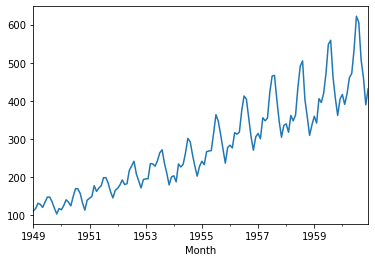

In [4]:
df_content = content.copy()
df_content['Month'] = pd.to_datetime(df_content['Month'], 
                                     infer_datetime_format=True)
y = pd.Series(df_content["#Passengers"].values, index=df_content['Month'])
y = y.astype('f')
y.plot()

In [5]:
# yは上のコードで取得した月ごとの旅客機の乗客数データ
y120 = y[:120]

<img src="arma.png">

<pre>
p, φは、自己回帰の次数および自己回帰係数。
q, θは、移動平均の次数および移動平均係数。
</pre>

<img src="arima.png">

<pre>
ARIMAモデルは、データ間の差分dを定義する
</pre>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

<BarContainer object of 119 artists>

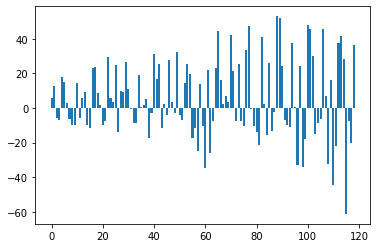

In [6]:
# 階差をとらないない場合(p=3,d=0,q=2)
# p: 自己回帰の次数。 q: 移動平均の次数
model_d0 = ARIMA(y120, (3, 0, 2))
results_d0 = model_d0.fit()
res_d0 = results_d0.resid
# 残差の出力
plt.bar(range(len(res_d0[1:])), res_d0[1:])

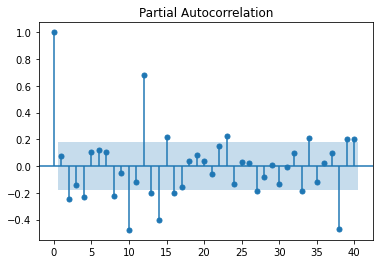

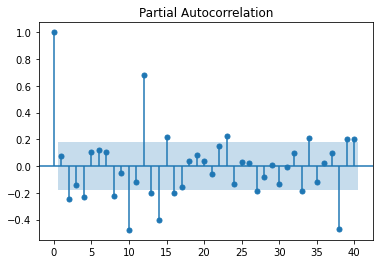

In [7]:
# 偏自己相関
tsaplots.plot_pacf(res_d0[1:], lags=40)
# ランダムウォーク過程のため自己相関はないことが確認できた

上の図では、ラグ0と12で偏自己相関が有意に高い →　12ヶ月周期に（季節変動）循環成分が捉えられていない。

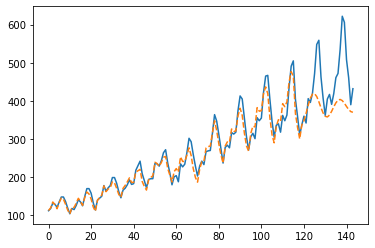

In [8]:
# 将来予測
# トレンドが捉えられていない
# 循環変動も捉えられていない

# 原系列の表示
plt.plot(y.values, label='observation')
# インサンプル（学習に使ったサンプルデータ）と
# ARIMA(3, 0, 2)による予測値を含めた系列の表示
# ARモデルの時とpredictの挙動が異なるので要注意
plt.plot(results_d0.predict(1, len(y)).values, 
         '--', label='forecast')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

<BarContainer object of 119 artists>

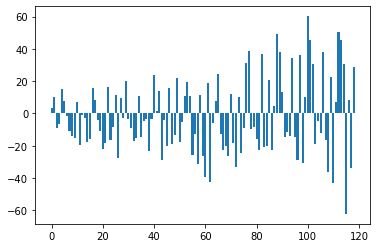

In [9]:
# 階差1をとったモデル(p=4,d=1,q=1)
model_d1 = ARIMA(y120, (4, 1, 1))
results_d1 = model_d1.fit()
res_d1 = results_d1.resid
# 残差の出力
plt.bar(range(len(res_d1)), res_d1)

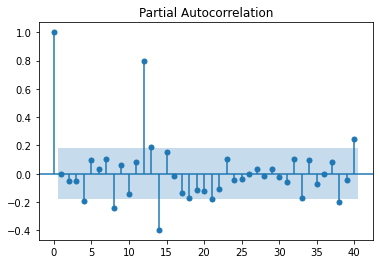

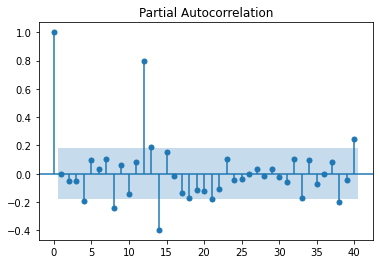

In [10]:
# 偏自己相関
tsaplots.plot_pacf(res_d1, lags=40)
# ランダムウォーク過程のため自己相関はないことが確認できた

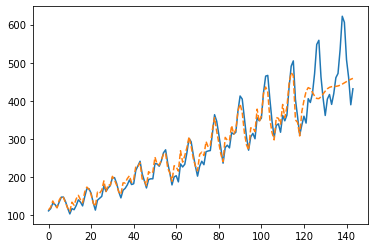

In [11]:
# 将来予測
# トレンドは捉えらている

# 原系列の表示
plt.plot(y.values, label='observation')
# インサンプル（学習に使ったサンプルデータ）と
# ARIMA(4, 1, 1)による予測値を含めた系列の表示
# 階差をとっているためインサンプルを
# 元データの形に戻すためtypオプションに'levels'を指定している
plt.plot(results_d1.predict(1, len(y), typ='levels').values, 
         '--', label='forecast')